In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
start = '2012-01-01'
end = '2024-01-01'
stock = 'INFY'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,6.706250,6.805000,6.662500,6.681250,4.987726,14123200
1,2012-01-04,6.700000,6.757500,6.638750,6.650000,4.964397,9913600
2,2012-01-05,6.651250,6.793750,6.640000,6.751250,5.039983,12347200
3,2012-01-06,6.726250,6.750000,6.640000,6.740000,5.031584,10824000
4,2012-01-09,6.771250,6.932500,6.752500,6.917500,5.164092,16880000
...,...,...,...,...,...,...,...
3013,2023-12-22,18.700001,18.889999,18.639999,18.760000,18.760000,7018100
3014,2023-12-26,18.639999,18.670000,18.370001,18.450001,18.450001,3866200
3015,2023-12-27,18.639999,18.680000,18.450001,18.600000,18.600000,4338000
3016,2023-12-28,18.610001,18.680000,18.530001,18.559999,18.559999,3308700


In [5]:
ma_100_days = data.Close.rolling(100).mean()

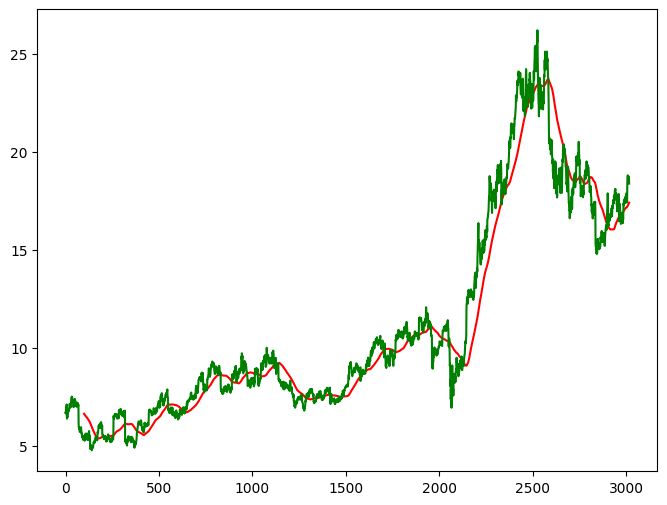

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

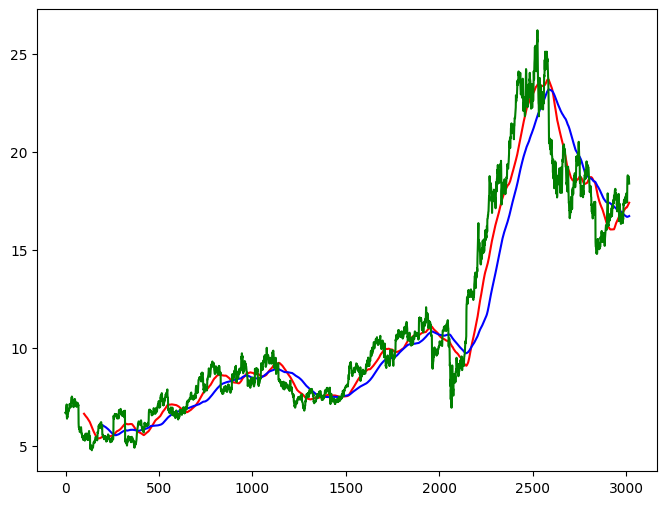

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

2414

In [12]:
data_test.shape[0]

604

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [16]:
x, y = np.array(x), np.array(y)

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
73/73 [==============================] - 48s 541ms/step - loss: 0.0175
Epoch 2/50
73/73 [==============================] - 37s 511ms/step - loss: 0.0046
Epoch 3/50
73/73 [==============================] - 37s 513ms/step - loss: 0.0039
Epoch 4/50
73/73 [==============================] - 37s 510ms/step - loss: 0.0032
Epoch 5/50
73/73 [==============================] - 38s 524ms/step - loss: 0.0035
Epoch 6/50
73/73 [==============================] - 36s 496ms/step - loss: 0.0031
Epoch 7/50
73/73 [==============================] - 38s 515ms/step - loss: 0.0032
Epoch 8/50
73/73 [==============================] - 37s 510ms/step - loss: 0.0026
Epoch 9/50
73/73 [==============================] - 37s 508ms/step - loss: 0.0024
Epoch 10/50
73/73 [==============================] - 37s 505ms/step - loss: 0.0028
Epoch 11/50
73/73 [==============================] - 37s 506ms/step - loss: 0.0021
Epoch 12/50
73/73 [==============================] - 37s 508ms/step - loss: 0.0022
Epoch 13/50
7

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
pas_100_days = data_train.tail(100)

In [23]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [24]:
data_test_scale  =  scaler.fit_transform(data_test)

In [25]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [48]:
# score = model.evaluate(x, y, verbose=0)
# print('Test loss:', score)
# print('Test accuracy:', score)
score = model.evaluate(x, y, verbose=0)

print(f'Test loss: {score} / Test accuracy: {score}')

Test loss: 24.94234275817871 / Test accuracy: 24.94234275817871


In [26]:
y_predict = model.predict(x)

19/19 [==============================] - 2s 62ms/step


In [27]:
scale =1/scaler.scale_

In [28]:
y_predict = y_predict*scale

In [29]:
y = y*scale

Test loss: 24.94234275817871
Test accuracy: 24.94234275817871


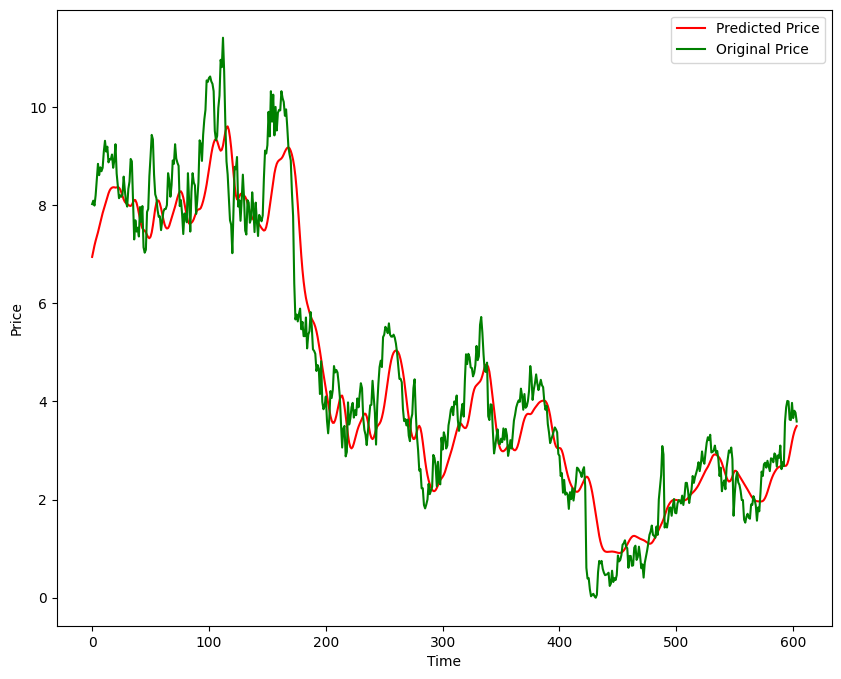

In [30]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [49]:
model.save('Stock Predicti Model.keras')